<a href="https://colab.research.google.com/github/Dejisimple/CSC-587_Colabs/blob/main/Copy_of_train_test_split_crossval_roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ✨ Lab questions

Try the following exercises to reinforce your learning:

1. Modify the `train_test_split` function to use **30% test data** instead of 20%.  
2. Change the classifier to **Support Vector Macines** and compare its ROC curve with Logistic Regression.  You can try different C values and vary your kernel functions. Please note that different kernel functions come with different parameters which you may want to change, too
3. Compute and visualize the **Precision-Recall Curve** in addition to the ROC curve.  (optional)


# Train-Test Split, Cross-Validation, and ROC Curve

This notebook will demonstrate:
- How to **split data** into training and testing sets using `train_test_split`
- How to perform **cross-validation** to evaluate model performance
- How to **plot an ROC curve** to assess classification performance

We will use the **Breast Cancer dataset** from `sklearn.datasets`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Set style
sns.set_style("whitegrid")


In [2]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Display first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 398
Testing set size: 171


In [4]:
# Perform 5-fold cross-validation with Logistic Regression
model = LogisticRegression(max_iter=10000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.96703297 0.92307692 0.94505495 0.95604396 0.93406593]
Mean accuracy: 0.945054945054945


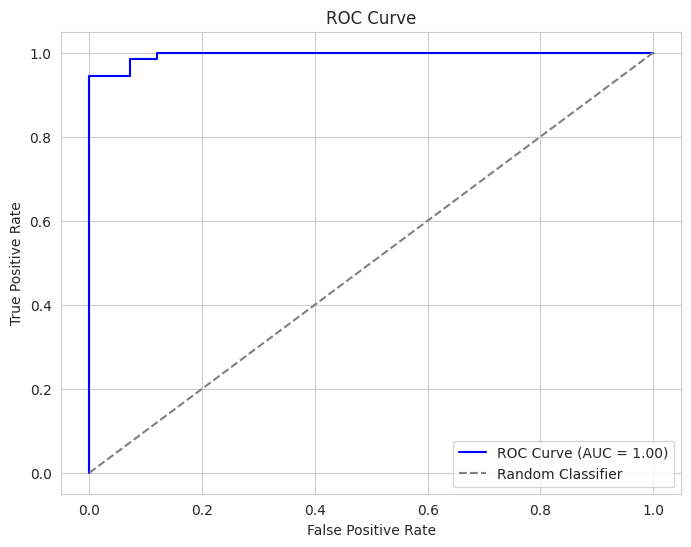

[[1.00000000e+00 3.26762996e-11]
 [3.49378143e-05 9.99965062e-01]
 [9.49519426e-01 5.04805740e-02]
 [3.95153940e-01 6.04846060e-01]
 [9.99999998e-01 2.00601520e-09]
 [1.73826608e-02 9.82617339e-01]
 [2.99397736e-05 9.99970060e-01]
 [9.99990183e-01 9.81721401e-06]
 [9.99951200e-01 4.88003398e-05]
 [1.00000000e+00 1.42322339e-10]
 [1.36917961e-03 9.98630820e-01]
 [9.95122098e-01 4.87790181e-03]
 [8.95746654e-04 9.99104253e-01]
 [9.99988929e-01 1.10708139e-05]
 [9.99429313e-01 5.70687112e-04]
 [6.05254941e-02 9.39474506e-01]
 [7.80504825e-01 2.19495175e-01]
 [2.13031175e-02 9.78696883e-01]
 [1.42817526e-03 9.98571825e-01]
 [2.06577045e-02 9.79342295e-01]
 [9.96126494e-01 3.87350590e-03]
 [9.87588044e-01 1.24119559e-02]
 [3.40153486e-04 9.99659847e-01]
 [7.50469541e-04 9.99249530e-01]
 [2.87093569e-02 9.71290643e-01]
 [6.42410342e-02 9.35758966e-01]
 [1.00000000e+00 4.20157951e-13]
 [5.51940851e-03 9.94480591e-01]
 [1.50702534e-03 9.98492975e-01]
 [3.32250065e-03 9.96677499e-01]
 [3.451738

In [5]:
# Fit model and get probabilities
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]#we're only interested in the probabilities for the positive class. Therefore, skip column 0

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(model.predict_proba(X_test))

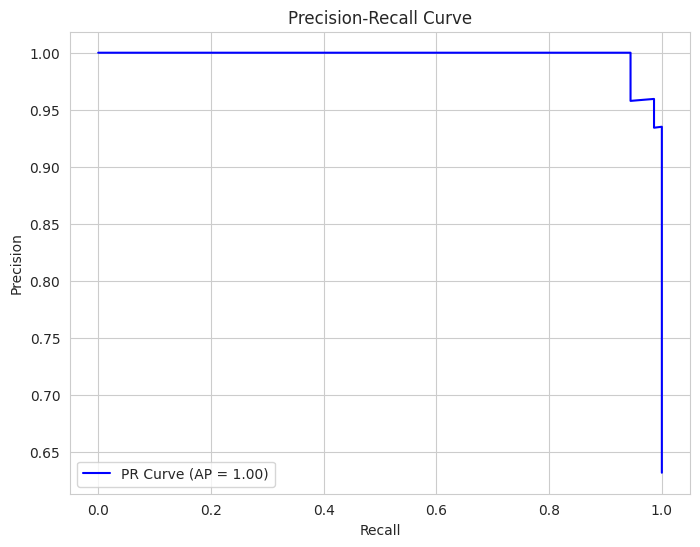

In [6]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute Average Precision (AP) Score
ap_score = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## ✨ Lab questions

Try the following exercises to reinforce your learning:

1. Modify the `train_test_split` function to use **30% test data** instead of 20%.  
2. Change the classifier to **Support Vector Macines** and compare its ROC curve with Logistic Regression.  You can try different C values and vary your kernel functions. Please note that different kernel functions come with different parameters which you may want to change, too
3. Compute and visualize the **Precision-Recall Curve** in addition to the ROC curve.  (optional)


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define different kernel functions to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = {}
svm_roc_data = {}

# Train SVM with different kernels and store ROC data
for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    svm_model = SVC(kernel=kernel, probability=True, random_state=42)
    svm_model.fit(X_train, y_train)
    svm_models[kernel] = svm_model

    # Get probabilities for SVM
    svm_y_scores = svm_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve for SVM
    svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_scores)
    svm_roc_auc = auc(svm_fpr, svm_tpr)
    svm_roc_data[kernel] = {'fpr': svm_fpr, 'tpr': svm_tpr, 'auc': svm_roc_auc}

Training SVM with linear kernel...
Training SVM with poly kernel...
Training SVM with rbf kernel...
Training SVM with sigmoid kernel...


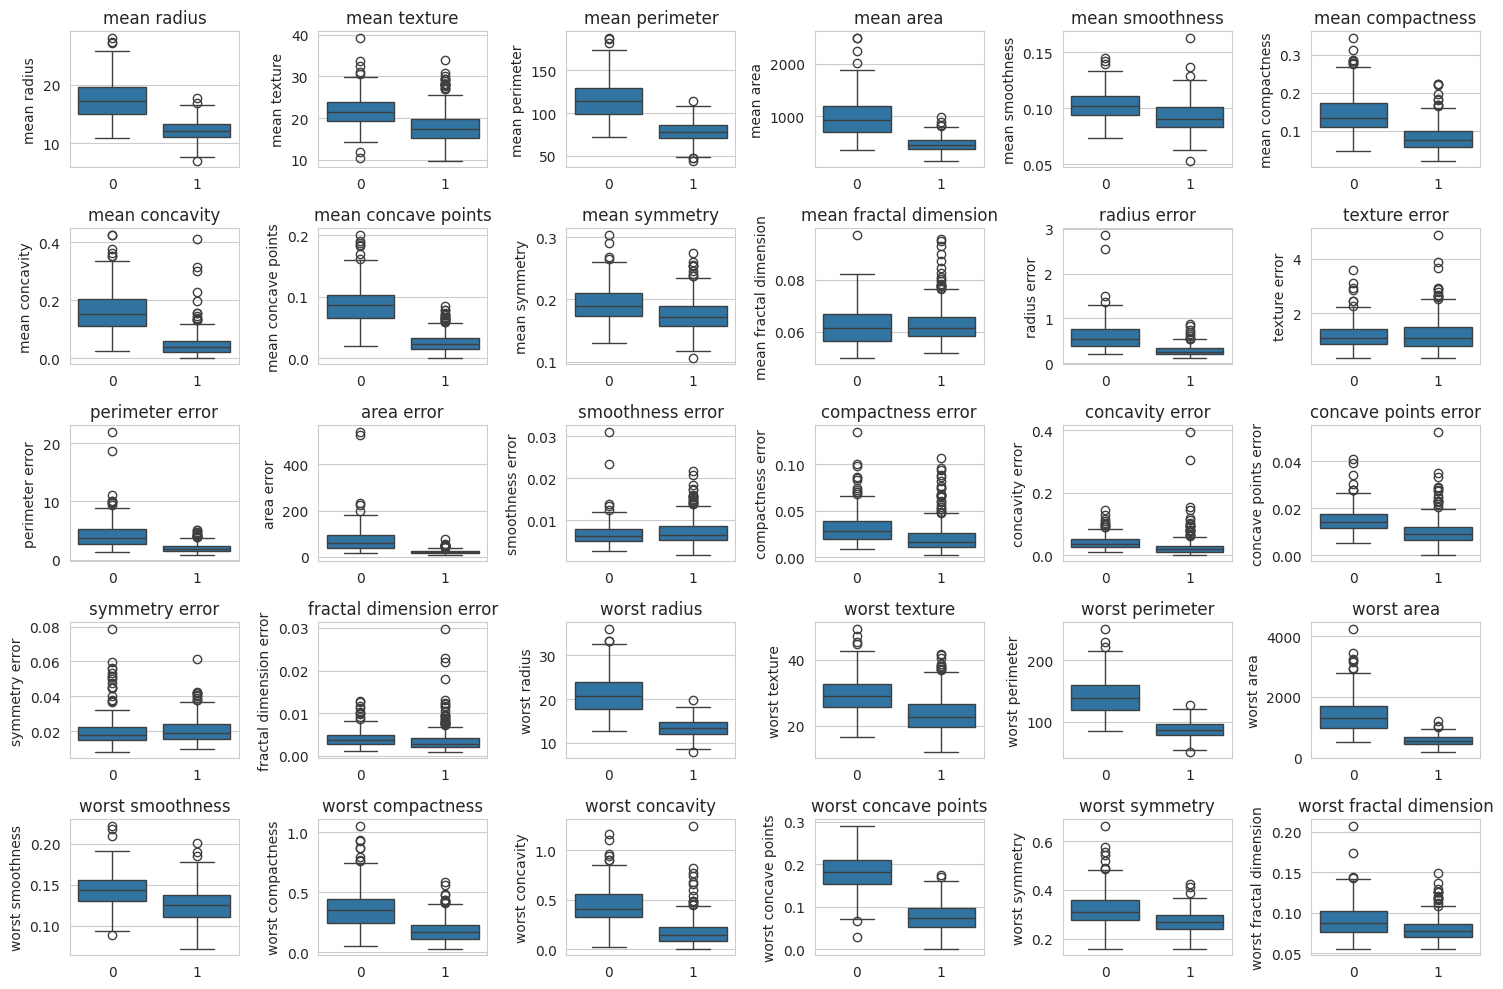

In [19]:
# Create box plots for each feature, grouped by target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[:-1]): # Exclude the target column
    plt.subplot(5, 6, i + 1) # Adjust the subplot grid as needed
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(feature)
    plt.xlabel('') # Remove x-label for individual plots
plt.tight_layout()
plt.show()

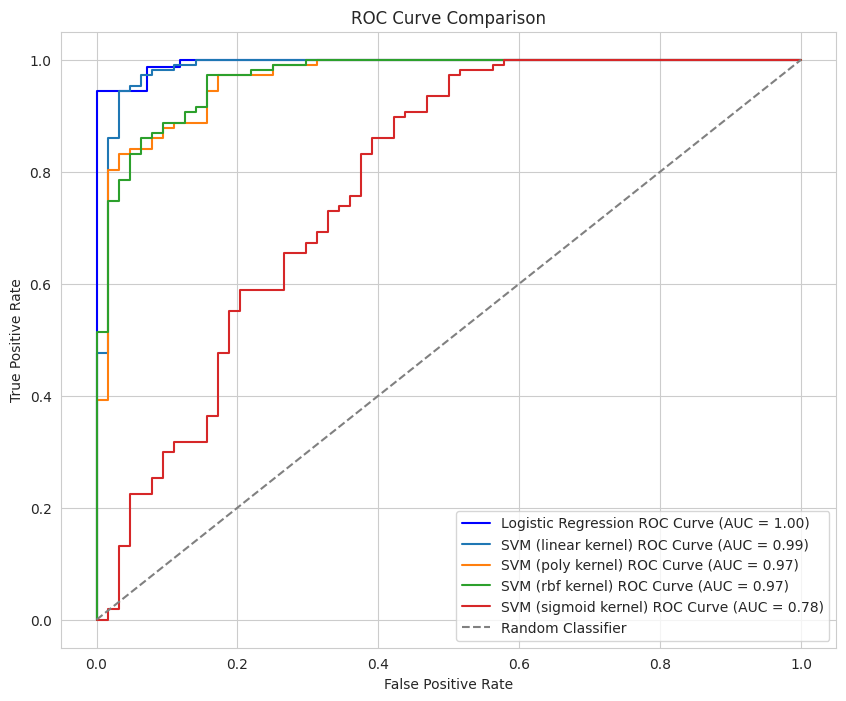

In [20]:
# Plot ROC Curves for Logistic Regression and different SVM kernels
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f"Logistic Regression ROC Curve (AUC = {roc_auc:.2f})")

for kernel, data in svm_roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f"SVM ({kernel} kernel) ROC Curve (AUC = {data['auc']:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

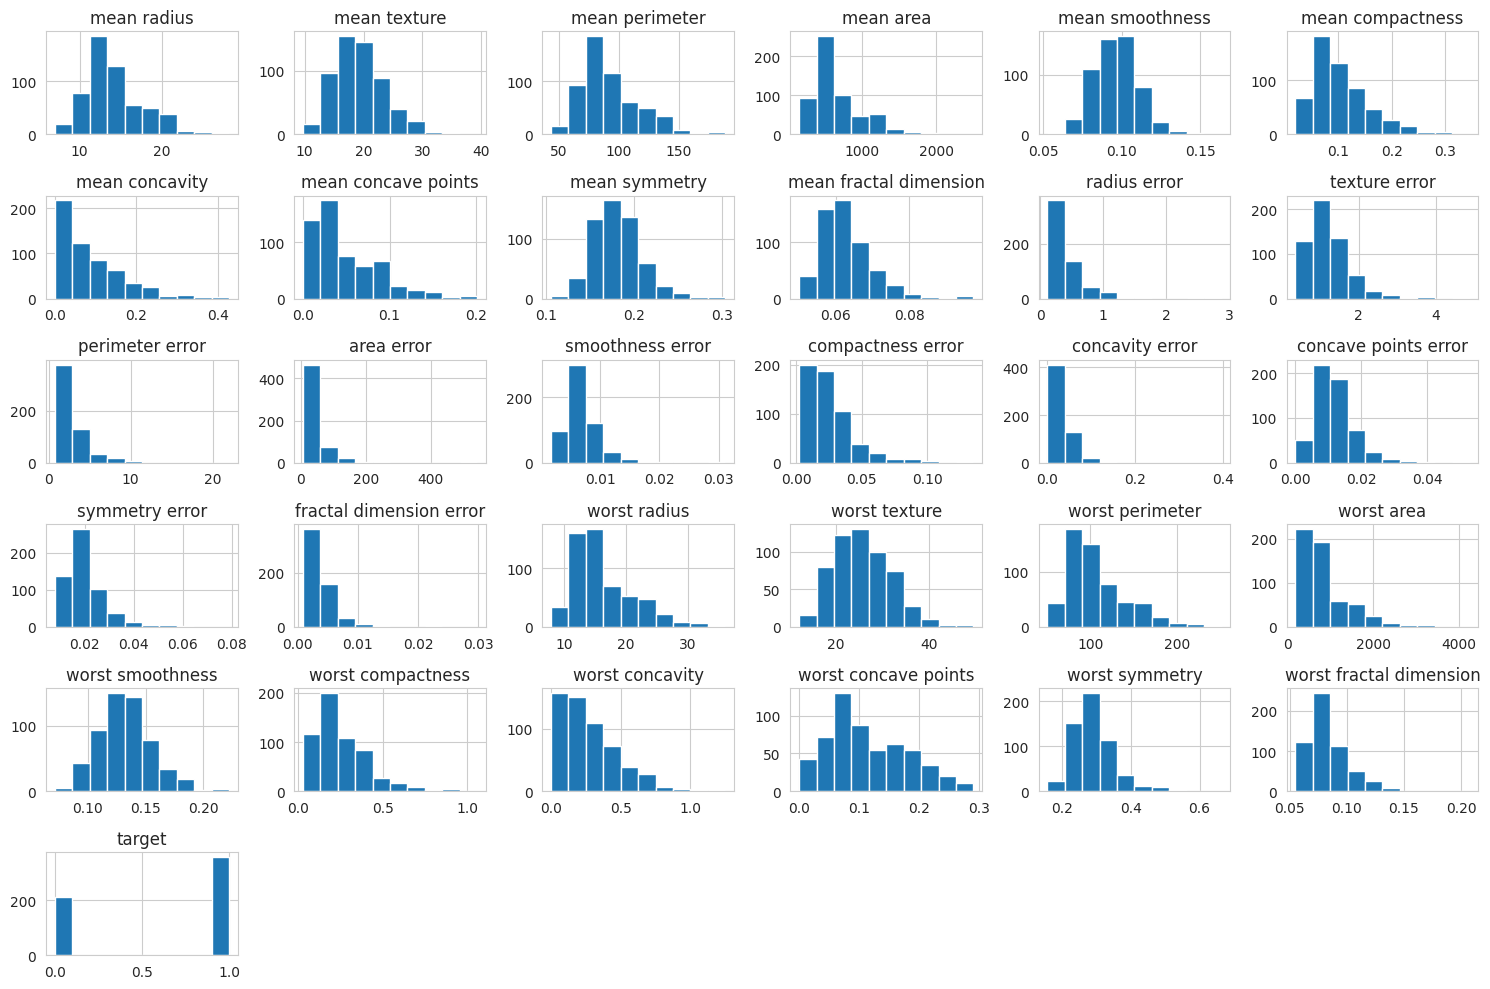

In [21]:
# Create histograms for each feature
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()